In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
total_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
total_df.head()
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
len(total_df['Mouse ID'].value_counts())

249

In [5]:
duplicate_df = total_df.loc[total_df['Mouse ID'] == 'g989']
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
#taking out the duplicated value
cleaned_df = total_df.loc[total_df['Mouse ID'] != 'g989']


#grouping by drug regimen for summary table
clean_group = cleaned_df.groupby(cleaned_df['Drug Regimen'])
clean_group.mean()
tumor_mean = clean_group['Tumor Volume (mm3)'].mean()
tumor_median = clean_group['Tumor Volume (mm3)'].median()
tumor_var = clean_group['Tumor Volume (mm3)'].var()
tumor_std = clean_group['Tumor Volume (mm3)'].std()
tumor_sem = clean_group['Tumor Volume (mm3)'].sem()

#create a dataframe of all the info

tumor_summary_df = {'Tumor Volume Mean': tumor_mean,
                'Tumor Volume Median': tumor_median,
                'Tumor Volume Variance': tumor_var,
                'Tumor Volume Standard Deviation': tumor_std,
                'Tumor Volume Standard Error': tumor_sem}
tumor_summary_df = pd.DataFrame(tumor_summary_df)

tumor_summary_fast = clean_group['Tumor Volume (mm3)'].aggregate(['mean', 'median', 'var', 'std', 'sem'], axis=0)
tumor_summary_fast

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
cleaned_df['Drug Regimen'].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [26]:
drug_list = clean_group['Drug Regimen']
meas_num = clean_group['Mouse ID'].count()

plot_df = {'Drug List': drug_list,
           'Total Number of Measurements': meas_num}
plot1_df = pd.DataFrame(plot_df)
plot1_df = plot1_df.sort_values(by=['Total Number of Measurements'], ascending=False)

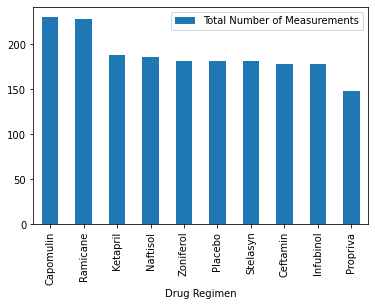

In [27]:
#pyplot 
aa = plot1_df.plot.bar(rot=90)